Element pattern
====
Last updated: 28 Sept 2018  

This notebook will read a CST antenna pattern file and save in a python formate for use by other notebooks.  
This notebook will also create an idealized pattern from a cartiod shape.  

For now will read old S-Band roll cut data from Rick and use as a base to generate a full pattern.  

In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read input file

In [2]:
# read sample patch gain pattern
df1 = pd.read_csv('Pattern data 1E.csv')
num = len(df1)
print('number of lines in data file = {:d}'.format(num))

number of lines in data file = 181


In [3]:
# show top of data file
df1.head(10)

Phi 
 Gain_dB 
 
 
 
 
 0 
 0 
 9.184574 
 
 
 1 
 2 
 9.172386 
 
 
 2 
 4 
 9.139465 
 
 
 3 
 6 
 9.085865 
 
 
 4 
 8 
 9.011686 
 
 
 5 
 10 
 8.917071 
 
 
 6 
 12 
 8.802208 
 
 
 7 
 14 
 8.667329 
 
 
 8 
 16 
 8.512712 
 
 
 9 
 18 
 8.338681

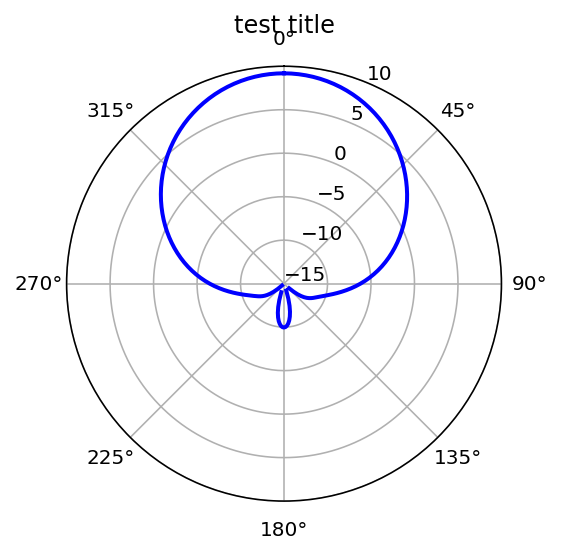

In [4]:
# read phi and gain values
phi = df1['Phi'].values
gain_dB = df1['Gain_dB'].values

# plot data in polar format
# The 111 specifies 1 row, 1 column on subplot #1
ax = plt.subplot(111, polar=True)
ax.grid(True)
minGrid = -15 #set plot grid
maxGrid = 11
gridSpacing = 5
ax.set_yticks(np.arange(minGrid,maxGrid,gridSpacing))
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.autoscale(enable=False)

# Polar plot
ax.plot(phi*2*np.pi/360,gain_dB, 'b', linewidth = 2, label = 'gain')

# Setting the graph title & legend
ax.set_title("test title")

plt.show()

In [5]:
# make variables theta and phi, need to convert to radians before any math
step = 2  # step size for various ranges
theta = np.arange(0,181,step) # 0 to 180 degrees, include end points
#phi = np.arange(-180,180,step) # 0 to 359 degrees

In [7]:
# make variables theta and phi, need to convert to radians before any math
step = 2  # step size for various ranges
theta = np.arange(-90,91,step) # 0 to 180 degrees, include end points
phi = np.arange(0,360,step) # 0 to 359 degrees

In [17]:
# build full pattern from roll cut pattern
R_dB = np.broadcast_to(gain_dB[0:-1], (len(theta),len(gain_dB)-1))  # full pattern
print('array, number of rows = {:d}'.format(np.shape(R)[0]))
print('array, number of columns = {:d}'.format(np.shape(R)[1]))

array, number of rows = 91
array, number of columns = 180


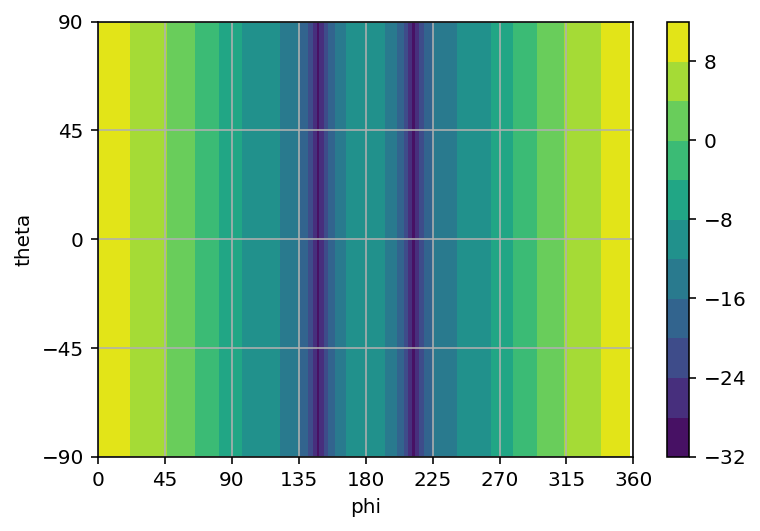

In [18]:
# set limits for plot
dB_limit = -40
F = R_dB
#F = 20*np.log10(abs(R)) # convert to dB magnitude
msk1 = F < dB_limit
fill = msk1 * dB_limit
msk2 = F >= dB_limit
R_plt = F * (msk2) + fill

X1, Y1 = np.meshgrid(phi, theta)

plt.contourf(X1,Y1,R_plt,10)
ax.set_aspect('equal', 'box')
plt.grid(True)
plt.xlabel('phi')
plt.ylabel('theta')
plt.ylim(-90,90)
plt.yticks(np.arange(-90, 90+1, step=45))
plt.xlim(0,360)
plt.xticks(np.arange(0, 360+1, step=45))
plt.colorbar(format='$%.0f$')
plt.show()

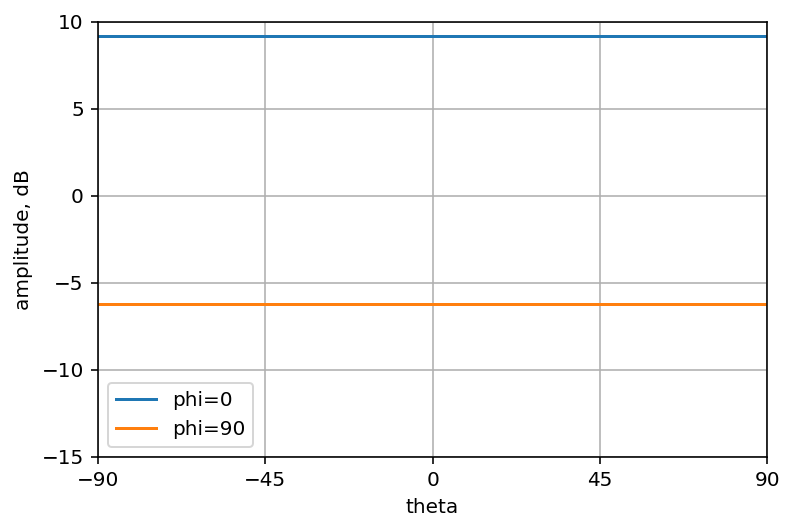

In [24]:
# plotting principle plane cuts
plt.plot(theta,R_dB[:,0],label='phi=0')
plt.plot(theta,R_dB[:,45],label='phi=90')
plt.grid(True)
plt.legend()
plt.xlabel('theta')
plt.ylabel('amplitude, dB')
plt.ylim(-15,10)
plt.xlim(-90,90)
plt.xticks(np.arange(-90, 90+1, step=45))
plt.show()

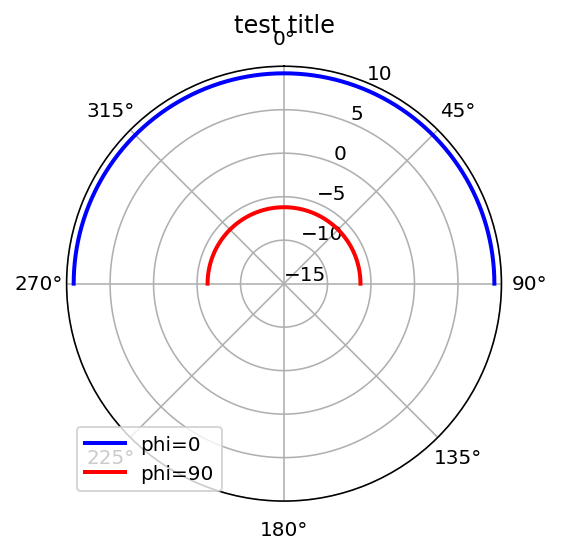

In [25]:
# plot data in polar format
# The 111 specifies 1 row, 1 column on subplot #1
ax = plt.subplot(111, polar=True)
ax.grid(True)
minGrid = -15 #set plot grid
maxGrid = 11
gridSpacing = 5
ax.set_yticks(np.arange(minGrid,maxGrid,gridSpacing))
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.autoscale(enable=False)

# Polar plot
ax.plot(theta*np.pi/180,R_dB[:,0],'b',linewidth = 2,label='phi=0')
ax.plot(theta*np.pi/180,R_dB[:,45],'r',linewidth = 2,label='phi=90')

# Setting the graph title & legend
ax.set_title("test title")
plt.legend()
plt.show()

In [27]:
# export element pattern
R = 10**(R_dB/10)
pickle.dump(R, open( "EP.pkl", "wb" ))

# calculated field for a rectangular patch

In [134]:
# starting parameters
f = 2300e6 # Hz
c = 299792458 # speed of light m/s
Lam = c/f
print("free space lambda = {:.3f} in".format(Lam*37.39))
ko = 2*np.pi/Lam
er = 2.32 # 2.3 for duroid

free space lambda = 4.874 in


In [138]:
# calculate width and length of a patch
h = 3.048e-3  # height of slot above ground plane
# calculate patch dimensions, centameters
W = c/(2*f)*((er+1)/2)**(-1/2)
e_eff = ((er+1)/2)+((er-1)/2)*(1+12*h/W)**(-1/2)
dl = h*0.412*((er+0.3)*(W/h+0.264))/((er-0.258)*(W/h+0.8))
L = c/(2*f*np.sqrt(e_eff))-2*dl
print("effective er: {:.3f}".format(e_eff))
print("patch length: {:.3f} in".format(L*37.39))
print("patch width: {:.3f} in".format(W*37.39))
print("patch lambda = {:.3f} in".format(Lam*37.39/e_eff))

effective er: 2.163
patch length: 1.541 in
patch width: 1.891 in
patch lambda = 2.253 in


# Calculated field for a idealized patch antenna
See reference for normalized radiation pattern.  
http://www.antenna-theory.com/antennas/patches/antenna.php  

In [3]:
# values used in ref
Lam = 1
W = Lam/2
L = Lam/2

In [47]:
# make variables theta and phi and convert to radians
step = 2  # step size for various ranges
theta_min = 0.1 # errors on 0
theta_max = 180
phi_min = 0.1
phi_max = 360
# convert deg to radians
theta = np.arange(theta_min,theta_max+1,step)*np.pi/180 # include end points
phi = np.arange(phi_min,phi_max,step)*np.pi/180

In [48]:
k = 2*np.pi/Lam
E_theta = np.zeros((len(theta),len(phi)))
E_phi = np.zeros((len(theta),len(phi)))

for i in range(len(theta)):
    for j in range(len(phi)):
        n1 = np.sin(k*W*np.sin(theta[i])*np.sin(phi[j]))
        d1 = k*W*np.sin(theta[i])*np.sin(phi[j])/2
        p1 = n1/d1
        p2 = np.cos(k*L*np.sin(theta[i])*np.cos(phi[j])/2)*np.cos(phi[j])
        E_theta[i,j] = p1*p2

        n1 = -np.sin(k*W*np.sin(theta[i])*np.sin(phi[j])/2)
        d1 = k*W*np.sin(theta[i])*np.sin(phi[j])/2
        p1 = n1/d1
        p2 = np.cos(k*L*np.sin(theta[i])*np.cos(phi[j])/2)*np.cos(theta[i])*np.sin(phi[j])
        E_phi[i,j] = p1*p2

F = np.sqrt(E_theta**2+E_phi**2)

In [49]:
# export element pattern
pickle.dump(F, open( "EP.pkl", "wb" ))

# plot the pattern

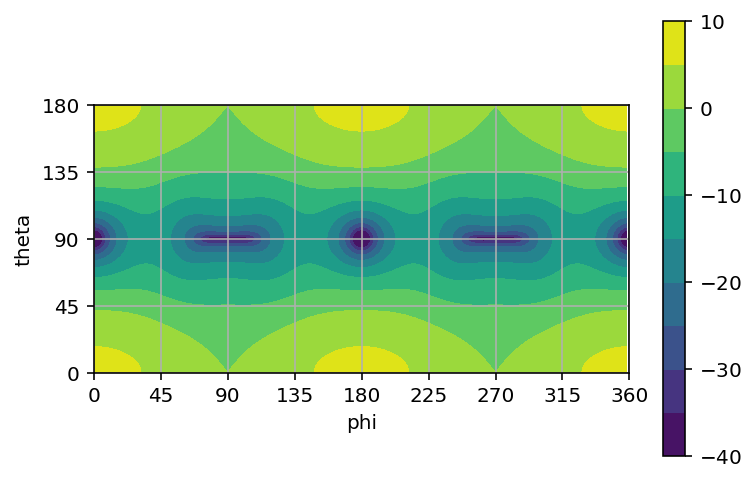

In [44]:
F_plt = 20*np.log10(abs(F)) # convert to dB magnitude for plotting
F_plt  = np.clip(F_plt,-40,np.inf) # set limits for plotted data

# re-build theta and phi in terms of deg
theta_min = 0
theta_max = 180
phi_min = 0
phi_max = 360
theta = np.arange(theta_min,theta_max+1,step) # include end points
phi = np.arange(phi_min,phi_max,step)
X1, Y1 = np.meshgrid(phi, theta)

plt.contourf(X1,Y1,F_plt,10)
plt.axis('image')
#ax.set_aspect('equal', 'box')
plt.grid(True)
plt.xlabel('phi')
plt.ylabel('theta')
plt.ylim(theta_min,theta_max)
plt.yticks(np.arange(theta_min, theta_max+1, step=45))
plt.xlim(phi_min,phi_max)
plt.xticks(np.arange(phi_min, phi_max+1, step=45))
plt.colorbar(format='$%.0f$')
plt.show()

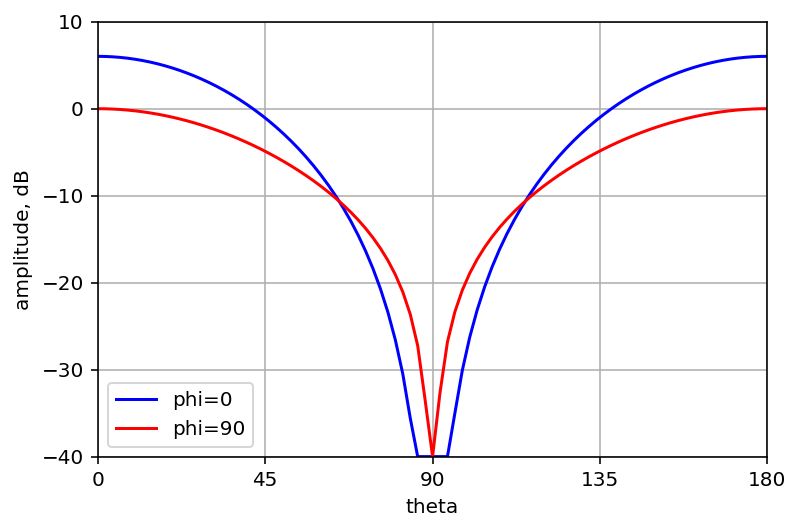

In [45]:
# plotting principle plane cuts
plt.plot(theta,F_plt[:,0],'b',label='phi=0')
plt.plot(theta,F_plt[:,45],'r',label='phi=90')
plt.grid(True)
plt.legend()
plt.xlabel('theta')
plt.ylabel('amplitude, dB')
plt.ylim(-40,10)
plt.xlim(theta_min,theta_max)
plt.xticks(np.arange(theta_min, theta_max+1, step=45))
plt.show()

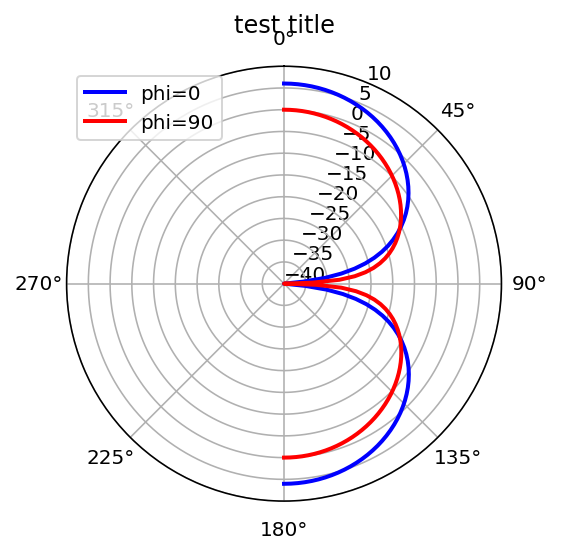

In [46]:
# plot data in polar format
# The 111 specifies 1 row, 1 column on subplot #1
ax = plt.subplot(111, polar=True)
ax.grid(True)
minGrid = -40 #set plot grid
maxGrid = 11
gridSpacing = 5
ax.set_yticks(np.arange(minGrid,maxGrid,gridSpacing))
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.autoscale(enable=False)

# Polar plot
ax.plot(theta*np.pi/180,F_plt[:,0],'b',linewidth = 2,label='phi=0')
ax.plot(theta*np.pi/180,F_plt[:,45],'r',linewidth = 2,label='phi=90')

# Setting the graph title & legend
ax.set_title("test title")
plt.legend()
plt.show()